# Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Bidirectional, Dense, Dropout, Input, Flatten, Concatenate, Add

In [3]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc

In [4]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [5]:
from tensorflow.keras.optimizers import Adam

## Final Data Prepare

In [6]:
same_df = pd.read_csv('/content/drive/MyDrive/Time Series Project/Stock Price/data/real_final_data/same_final.csv')
int_df = pd.read_csv('/content/drive/MyDrive/Time Series Project/Stock Price/data/real_final_data/int_final.csv')

In [7]:
same_df['Date'] = pd.to_datetime(same_df['Date'])
int_df['Date'] = pd.to_datetime(int_df['Date'])

In [8]:
boolean_columns = [
    "Covid19",
    "US_President_Republican",
    "US_President_Democratic",
    "KR_President_Democratic",
    "KR_President_Conservative",
    "KR_President_Neutral"
]

same_df[boolean_columns] = same_df[boolean_columns].astype(bool)
int_df[boolean_columns] = int_df[boolean_columns].astype(bool)

# Set Index
same_df.set_index('Date', inplace = True)
int_df.set_index('Date', inplace = True)

# Normalization
features = ['Open', 'High', 'Low', 'Volume', 'Change', 'Transaction','SE_Operating_Profit', 'SE_Net_Profit', 'SE_Total_Equity',
       'SE_Total_Liabilities', 'SE_Revenue', 'SE_Foreign', 'US_Inflation', 'KR_Inflation', 'CN_Inflation', 'US_GDP_Annual', 'KR_GDP_Annual',
       'CN_GDP_Annual', 'US_Economic_Growth_Rate', 'KR_Economic_Growth_Rate', 'US_Base', 'US_10', 'KR_Base', 'KR_10', 'WTI', 'Exchange', 'SOX_Close',
       'Phone', 'KR_Unemployment', 'Covid19', 'US_President_Republican', 'US_President_Democratic', 'KR_President_Democratic', 'KR_President_Conservative', 'KR_President_Neutral',
       'BB_High', 'BB_Low', 'RSI', 'Volume_Price_Ratio', 'Volume_Momentum', 'High_Low_Volatility', 'Lag_1', 'Lag_30', 'Lag_60', 'Lag_90']
target = ['Close']

x_train_same = same_df[features][:3519].values
y_train_same = same_df[target][:3519].values

x_val_same = same_df[features][3519:4692].values
y_val_same = same_df[target][3519:4692].values

x_test_same = same_df[features][4692:].values
y_test_same = same_df[target][4692:].values

x_scaler_same_df, y_scaler_same_df = MinMaxScaler(), MinMaxScaler()

x_train_same = x_scaler_same_df.fit_transform(x_train_same)
y_train_same = y_scaler_same_df.fit_transform(y_train_same.reshape(-1, 1))

x_val_same = x_scaler_same_df.transform(x_val_same)
y_val_same = y_scaler_same_df.transform(y_val_same.reshape(-1, 1))

x_test_same = x_scaler_same_df.transform(x_test_same)
y_test_same = y_scaler_same_df.transform(y_test_same.reshape(-1, 1))

In [9]:
x_train_int = int_df[features][:3519].values
y_train_int = int_df[target][:3519].values

x_val_int = int_df[features][3519:4692].values
y_val_int = int_df[target][3519:4692].values

x_test_int = int_df[features][4692:].values
y_test_int = int_df[target][4692:].values

x_scaler_int_df, y_scaler_int_df = MinMaxScaler(), MinMaxScaler()

x_train_int = x_scaler_int_df.fit_transform(x_train_int)
y_train_int = y_scaler_int_df.fit_transform(y_train_int.reshape(-1, 1))

x_val_int = x_scaler_int_df.transform(x_val_int)
y_val_int = y_scaler_int_df.transform(y_val_int.reshape(-1, 1))

x_test_int = x_scaler_int_df.transform(x_test_int)
y_test_int = y_scaler_int_df.transform(y_test_int.reshape(-1, 1))

### Feature Selection

In [10]:
features0_same = ['Open', 'High', 'Low', 'Volume', 'Change', 'Transaction', 'US_10',  'WTI', 'Exchange',
      'BB_High', 'BB_Low', 'RSI', 'Volume_Price_Ratio', 'Volume_Momentum', 'High_Low_Volatility', 'Lag_1', 'Lag_30', 'Lag_60', 'Lag_90']

features0_int = ['Open', 'High', 'Low', 'Volume', 'Change', 'Transaction', 'BB_High', 'BB_Low', 'RSI', 'Volume_Price_Ratio', 'Volume_Momentum', 'High_Low_Volatility', 'Lag_1']

In [11]:
len(features0_int)

13

In [12]:
selected_x_train_same = same_df[features0_same][:3519].values
selected_y_train_same = same_df[target][:3519].values

selected_x_val_same = same_df[features0_same][3519:4692].values
selected_y_val_same = same_df[target][3519:4692].values

selected_x_test_same = same_df[features0_same][4692:].values
selected_y_test_same = same_df[target][4692:].values

x_scaler_selected_same_df, y_scaler_selected_same_df = MinMaxScaler(), MinMaxScaler()

selected_x_train_same = x_scaler_selected_same_df.fit_transform(selected_x_train_same)
selected_y_train_same = y_scaler_selected_same_df.fit_transform(selected_y_train_same.reshape(-1, 1))

selected_x_val_same = x_scaler_selected_same_df.transform(selected_x_val_same)
selected_y_val_same = y_scaler_selected_same_df.transform(selected_y_val_same.reshape(-1, 1))

selected_x_test_same = x_scaler_selected_same_df.transform(selected_x_test_same)
selected_y_test_same = y_scaler_selected_same_df.transform(selected_y_test_same.reshape(-1, 1))

In [13]:
selected_x_train_int = int_df[features0_int][:3519].values
selected_y_train_int = int_df[target][:3519].values

selected_x_val_int = int_df[features0_int][3519:4692].values
selected_y_val_int = int_df[target][3519:4692].values

selected_x_test_int = int_df[features0_int][4692:].values
selected_y_test_int = int_df[target][4692:].values

x_scaler_selected_int_df, y_scaler_selected_int_df = MinMaxScaler(), MinMaxScaler()

selected_x_train_int = x_scaler_selected_int_df.fit_transform(selected_x_train_int)
selected_y_train_int = y_scaler_selected_int_df.fit_transform(selected_y_train_int.reshape(-1, 1))

selected_x_val_int = x_scaler_selected_int_df.transform(selected_x_val_int)
selected_y_val_int = y_scaler_selected_int_df.transform(selected_y_val_int.reshape(-1, 1))

selected_x_test_int = x_scaler_selected_int_df.transform(selected_x_test_int)
selected_y_test_int = y_scaler_selected_int_df.transform(selected_y_test_int.reshape(-1, 1))

In [14]:
selected_x_train_int.shape

(3519, 13)

In [15]:
print(x_scaler_selected_int_df.n_features_in_)

13


## Without Outlier Process Data Prepare

In [16]:
same_wo = pd.read_csv('/content/drive/MyDrive/Time Series Project/Stock Price/data/real_final_data/same_no_outlier.csv')
int_wo = pd.read_csv('/content/drive/MyDrive/Time Series Project/Stock Price/data/real_final_data/int_no_outlier.csv')

In [17]:
boolean_columns = [
    "Covid19",
    "US_President_Republican",
    "US_President_Democratic",
    "KR_President_Democratic",
    "KR_President_Conservative",
    "KR_President_Neutral"
]

same_wo[boolean_columns] = same_wo[boolean_columns].astype(bool)
int_wo[boolean_columns] = int_wo[boolean_columns].astype(bool)

# Set Index
same_wo.set_index('Date', inplace = True)
int_wo.set_index('Date', inplace = True)

# Normalization
features = ['Open', 'High', 'Low', 'Volume', 'Change', 'Transaction','SE_Operating_Profit', 'SE_Net_Profit', 'SE_Total_Equity',
       'SE_Total_Liabilities', 'SE_Revenue', 'SE_Foreign', 'US_Inflation', 'KR_Inflation', 'CN_Inflation', 'US_GDP_Annual', 'KR_GDP_Annual',
       'CN_GDP_Annual', 'US_Economic_Growth_Rate', 'KR_Economic_Growth_Rate', 'US_Base', 'US_10', 'KR_Base', 'KR_10', 'WTI', 'Exchange', 'SOX_Close',
       'Phone', 'KR_Unemployment', 'Covid19', 'US_President_Republican', 'US_President_Democratic', 'KR_President_Democratic', 'KR_President_Conservative', 'KR_President_Neutral',
       'BB_High', 'BB_Low', 'RSI', 'Volume_Price_Ratio', 'Volume_Momentum', 'High_Low_Volatility', 'Lag_1', 'Lag_30', 'Lag_60', 'Lag_90']
target = ['Close']

x_train_same_wo = same_wo[features][:3519].values
y_train_same_wo = same_wo[target][:3519].values

x_val_same_wo = same_wo[features][3519:4692].values
y_val_same_wo = same_wo[target][3519:4692].values

x_test_same_wo = same_wo[features][4692:].values
y_test_same_wo = same_wo[target][4692:].values

x_scaler_same_wo, y_scaler_same_wo = MinMaxScaler(), MinMaxScaler()

x_train_same_wo = x_scaler_same_wo.fit_transform(x_train_same_wo)
y_train_same_wo = y_scaler_same_wo.fit_transform(y_train_same_wo.reshape(-1, 1))

x_val_same_wo = x_scaler_same_wo.transform(x_val_same_wo)
y_val_same_wo = y_scaler_same_wo.transform(y_val_same_wo.reshape(-1, 1))

x_test_same_wo = x_scaler_same_wo.transform(x_test_same_wo)
y_test_same_wo = y_scaler_same_wo.transform(y_test_same_wo.reshape(-1, 1))

In [18]:
x_train_int_wo = int_wo[features][:3519].values
y_train_int_wo = int_wo[target][:3519].values

x_val_int_wo = int_wo[features][3519:4692].values
y_val_int_wo = int_wo[target][3519:4692].values

x_test_int_wo = int_wo[features][4692:].values
y_test_int_wo = int_wo[target][4692:].values

x_scaler_int_wo, y_scaler_int_wo = MinMaxScaler(), MinMaxScaler()

x_train_int_wo = x_scaler_int_wo.fit_transform(x_train_int_wo)
y_train_int_wo = y_scaler_int_wo.fit_transform(y_train_int_wo.reshape(-1, 1))

x_val_int_wo = x_scaler_int_wo.transform(x_val_int_wo)
y_val_int_wo = y_scaler_int_wo.transform(y_val_int_wo.reshape(-1, 1))

x_test_int_wo = x_scaler_int_wo.transform(x_test_int_wo)
y_test_int_wo = y_scaler_int_wo.transform(y_test_int_wo.reshape(-1, 1))

### Feature Selection

In [19]:
features2_same = ['Open', 'High', 'Low', 'Volume', 'Change', 'Transaction', 'BB_Low', 'RSI', 'Volume_Price_Ratio', 'Volume_Momentum', 'High_Low_Volatility', 'Lag_1', 'Lag_30']

features2_int = ['Open', 'High', 'Low', 'Volume', 'Change', 'Transaction', 'WTI', 'SOX_Close',
       'BB_High', 'BB_Low', 'RSI', 'Volume_Price_Ratio', 'Volume_Momentum', 'High_Low_Volatility', 'Lag_1', 'Lag_30', 'Lag_60', 'Lag_90']

In [20]:
selected_x_train_same_wo = same_wo[features2_same][:3519].values
selected_y_train_same_wo = same_wo[target][:3519].values

selected_x_val_same_wo = same_wo[features2_same][3519:4692].values
selected_y_val_same_wo = same_wo[target][3519:4692].values

selected_x_test_same_wo = same_wo[features2_same][4692:].values
selected_y_test_same_wo = same_wo[target][4692:].values

x_scaler_selected_same_wo, y_scaler_selected_same_wo = MinMaxScaler(), MinMaxScaler()

selected_x_train_same_wo = x_scaler_selected_same_wo.fit_transform(selected_x_train_same_wo)
selected_y_train_same_wo = y_scaler_selected_same_wo.fit_transform(selected_y_train_same_wo.reshape(-1, 1))

selected_x_val_same_wo = x_scaler_selected_same_wo.transform(selected_x_val_same_wo)
selected_y_val_same_wo = y_scaler_selected_same_wo.transform(selected_y_val_same_wo.reshape(-1, 1))

selected_x_test_same_wo = x_scaler_selected_same_wo.transform(selected_x_test_same_wo)
selected_y_test_same_wo = y_scaler_selected_same_wo.transform(selected_y_test_same_wo.reshape(-1, 1))

In [21]:
selected_x_train_int_wo = int_wo[features2_int][:3519].values
selected_y_train_int_wo = int_wo[target][:3519].values

selected_x_val_int_wo = int_wo[features2_int][3519:4692].values
selected_y_val_int_wo = int_wo[target][3519:4692].values

selected_x_test_int_wo = int_wo[features2_int][4692:].values
selected_y_test_int_wo = int_wo[target][4692:].values

x_scaler_selected_int_wo, y_scaler_selected_int_wo = MinMaxScaler(), MinMaxScaler()

selected_x_train_int_wo = x_scaler_selected_int_wo.fit_transform(selected_x_train_int_wo)
selected_y_train_int_wo = y_scaler_selected_int_wo.fit_transform(selected_y_train_int_wo.reshape(-1, 1))

selected_x_val_int_wo = x_scaler_selected_int_wo.transform(selected_x_val_int_wo)
selected_y_val_int_wo = y_scaler_selected_int_wo.transform(selected_y_val_int_wo.reshape(-1, 1))

selected_x_test_int_wo = x_scaler_selected_int_wo.transform(selected_x_test_int_wo)
selected_y_test_int_wo = y_scaler_selected_int_wo.transform(selected_y_test_int_wo.reshape(-1, 1))

# Model Setting

In [22]:
!pip install wandb -qU

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 76.1 MB/s eta 0:00:00


In [23]:
!pip install tensorflow

In [24]:
import wandb
from wandb.integration.keras import WandbCallback

In [25]:
wandb.login(key='b0f579d1228ea5f3cfac162435df78243cadca62')

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: yebin. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [26]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_memory_growth(gpus[0], True)
        print("GPU is set to be used.")
    except RuntimeError as e:
        print(f"Error setting GPU memory growth: {e}")
else:
    print("No GPU found. Using CPU instead.")

No GPU found. Using CPU instead.


In [27]:
def create_sequences(X, y, time_steps):
    sequences, labels = [], []
    for i in range(len(X) - time_steps):
        sequences.append(X[i:i+time_steps])
        labels.append(y[i+time_steps])
    return np.array(sequences), np.array(labels)

def rmse_metric(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_true - y_pred)))

In [28]:
import tensorflow as tf
from tensorflow.keras.layers import Layer

class Attention(Layer):
    def __init__(self, **kwargs):
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(name='attention_weight', shape=(input_shape[-1], input_shape[-1]),
                                 initializer='random_normal', trainable=True)
        self.b = self.add_weight(name='attention_bias', shape=(input_shape[-1],),
                                 initializer='zeros', trainable=True)
        self.V = self.add_weight(name='attention_score', shape=(input_shape[-1], 1),
                                 initializer='random_normal', trainable=True)

    def call(self, inputs):
        # Attention mechanism
        score = tf.nn.tanh(tf.tensordot(inputs, self.W, axes=1) + self.b)
        attention_weights = tf.nn.softmax(tf.tensordot(score, self.V, axes=1), axis=1)
        context_vector = attention_weights * inputs
        context_vector = tf.reduce_sum(context_vector, axis=1)
        return context_vector

In [29]:
class MultiHeadAttentionLayer(tf.keras.layers.Layer):
    def __init__(self, num_heads, key_dim):
        super(MultiHeadAttentionLayer, self).__init__()
        self.attention = tf.keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=key_dim)

    def call(self, query, value):
        return self.attention(query=query, value=value, key=value)

In [30]:
early_stopping = EarlyStopping(
    monitor='val_loss',  # 모니터할 지표 (예: 'val_loss' 또는 'val_rmse')
    patience=5,          # 성능 향상이 없는 epoch 수 (5번 동안 개선 없으면 중단)
    restore_best_weights=True,  # 가장 성능이 좋은 가중치를 복원
    mode = 'min'
    #verbose=1            # 로그 출력 여부
)

# Loss & Score

### Final Same Init

In [31]:
wandb.finish()

In [32]:
wandb.init(project="LSTM Final - Same", name="initial", config={
    "epochs": 30,
    "batch_size": 32,
    "time_steps": 30,
    "lstm_units": [64, 64],
    "optimizer": "adam",
    "loss": "mse",
},reinit=True)

time_steps = 30

model_same_init = tf.keras.Sequential([
    tf.keras.layers.LSTM(wandb.config.lstm_units[0], activation='tanh', input_shape=(time_steps, len(features)), return_sequences=True),
    tf.keras.layers.LSTM(wandb.config.lstm_units[1], activation='tanh'),
    tf.keras.layers.Dense(1)
])

model_same_init.compile(optimizer=wandb.config.optimizer, loss='mse', metrics=['mse'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [33]:
model_same_init.load_weights('/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/Initial.weights.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


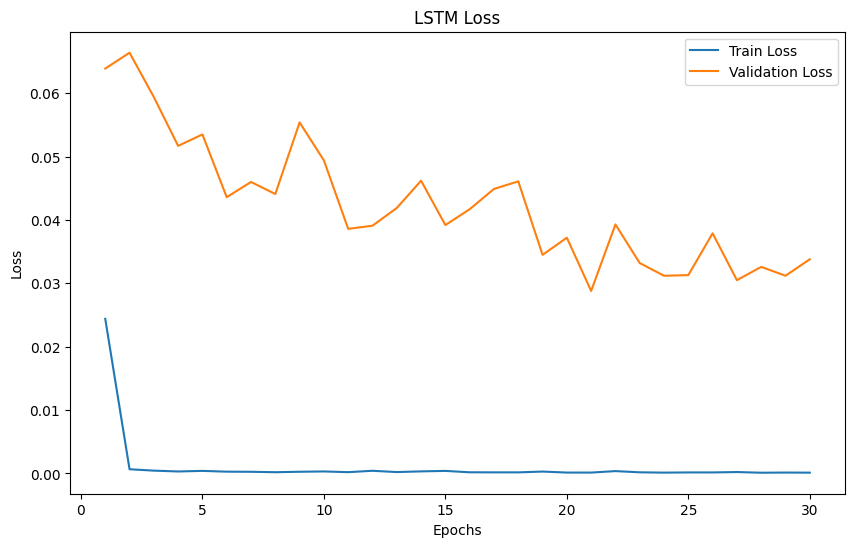

In [38]:
import matplotlib.pyplot as plt

# Extracted data for training and validation loss
epochs = list(range(1, 31))
train_loss = [
    0.0244, 0.0006618, 0.0004437, 0.0003107, 0.0004028, 0.0002804,
    0.0002619, 0.0001926, 0.0002659, 0.0003144, 0.0002021, 0.0004189,
    0.0002177, 0.0003264, 0.0004001, 0.0001821, 0.0001721, 0.0001687,
    0.0002960, 0.0001379, 0.0001361, 0.0003689, 0.0001779, 0.0001276,
    0.0001594, 0.0001594, 0.0002200, 0.0001135, 0.0001394, 0.0001253
]
val_loss = [
    0.0639, 0.0664, 0.0594, 0.0517, 0.0535, 0.0436,
    0.0460, 0.0441, 0.0554, 0.0494, 0.0386, 0.0391,
    0.0419, 0.0462, 0.0392, 0.0417, 0.0449, 0.0461,
    0.0345, 0.0372, 0.0288, 0.0393, 0.0332, 0.0312,
    0.0313, 0.0379, 0.0305, 0.0326, 0.0312, 0.0338
]

# Plotting train loss vs val loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, label='Train Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('LSTM Loss')
plt.legend()
plt.show()


36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


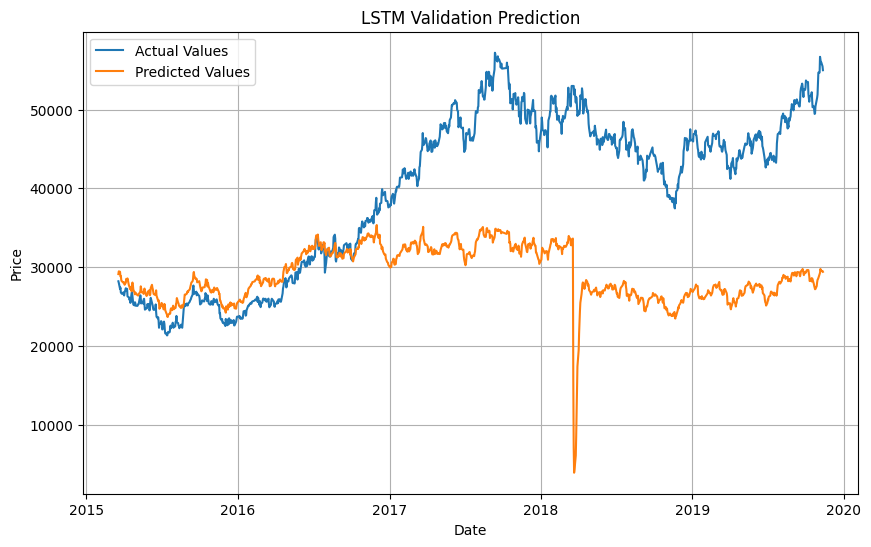

In [55]:
X_val, y_val = create_sequences(x_val_same, y_val_same, time_steps)

y_pred = model_same_init.predict(X_val)
y_pred = y_scaler_same_df.inverse_transform(y_pred)
y_pred = np.round(np.exp(y_pred), 4)

y_val =y_scaler_same_df.inverse_transform(y_val)
y_val = np.round(np.exp(y_val), 4)

plt.figure(figsize=(10, 6))
plt.plot(same_df[features][3519:4662].index, np.squeeze(y_val), label='Actual Values')
plt.plot(same_df[features][3519:4662].index, np.squeeze(y_pred), label='Predicted Values')
plt.title('LSTM Validation Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [58]:
mse = mean_squared_error(y_val , y_pred )
rmse = np.sqrt(mean_squared_error(y_val , y_pred ))
mae = mean_absolute_error(y_val , y_pred )
r2 = r2_score(y_val , y_pred )

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

MAE: 11657.4166
MSE: 209150251.1026
RMSE: 14462.0279
R²: -1.0223


In [59]:
wandb.finish()

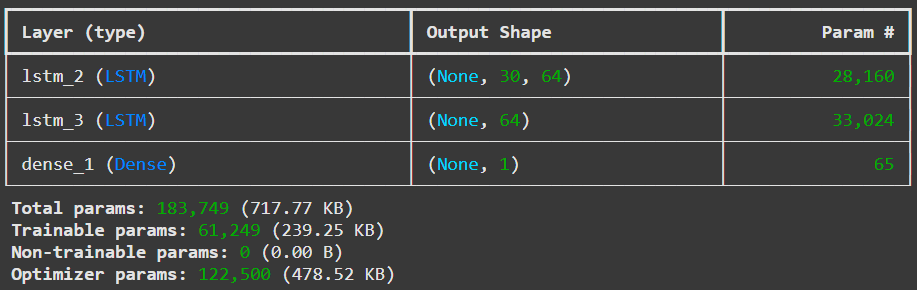

### Final Same Hyper

In [60]:
wandb.init(project="LSTM Final - Same", name="hyper3", config={
    "epochs": 50,
    "batch_size": 32,
    "time_steps": 5,
    "lstm_units": [64, 64, 64],
    "optimizer": "adam",
    "loss": "mse",
},reinit=True)

time_steps = 5

model_same_hyper3 = tf.keras.Sequential([
    tf.keras.layers.LSTM(wandb.config.lstm_units[0], activation='tanh', input_shape=(time_steps, len(features)), return_sequences=True),
    tf.keras.layers.LSTM(wandb.config.lstm_units[1], activation='tanh', return_sequences=True),
    tf.keras.layers.LSTM(wandb.config.lstm_units[2], activation='tanh'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

model_same_hyper3.compile(optimizer=wandb.config.optimizer, loss='mse', metrics=['mse'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [61]:
model_same_hyper3.load_weights('/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/hyper3.weights.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 28 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [62]:
model_same_hyper3.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 5, 64)               │          28,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 5, 64)               │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 98,433 (384.50 KB)

 Trainable params: 98,433 (384.50 KB)

 Non-trainable params: 0 (0.00 B)

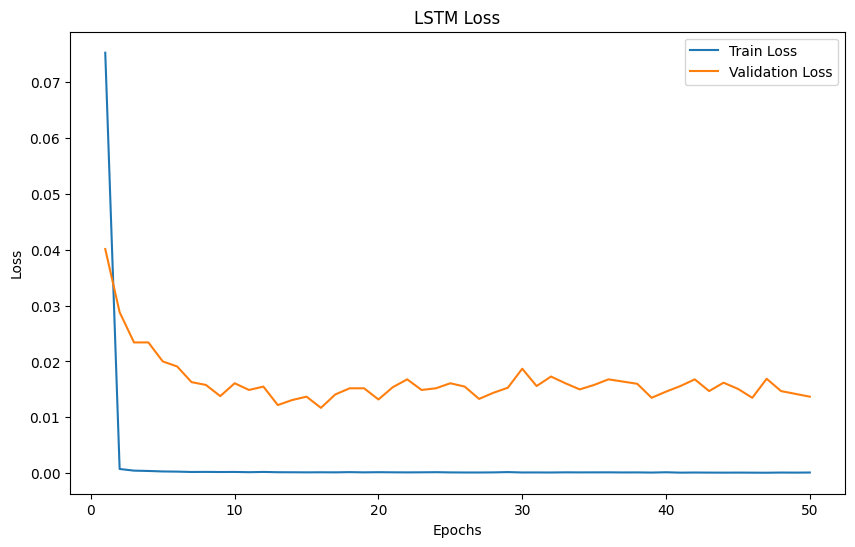

In [63]:
import matplotlib.pyplot as plt

# Epochs and corresponding train/validation losses
epochs = list(range(1, 51))
train_loss = [
    0.0752, 7.7117e-04, 4.7469e-04, 4.1541e-04, 3.2935e-04, 2.9992e-04, 2.3509e-04, 2.5012e-04, 2.2891e-04,
    2.4157e-04, 1.9735e-04, 2.4381e-04, 1.9054e-04, 1.8315e-04, 1.6819e-04, 1.8120e-04, 1.6925e-04, 2.0823e-04,
    1.6714e-04, 1.9635e-04, 1.7477e-04, 1.6131e-04, 1.7469e-04, 1.9746e-04, 1.5804e-04, 1.4285e-04, 1.4348e-04,
    1.6178e-04, 2.1398e-04, 1.4668e-04, 1.5235e-04, 1.4136e-04, 1.7024e-04, 1.5984e-04, 1.6413e-04, 1.7098e-04,
    1.5066e-04, 1.5904e-04, 1.3073e-04, 1.8328e-04, 1.1571e-04, 1.3722e-04, 1.2355e-04, 1.1589e-04, 1.2481e-04,
    1.1266e-04, 1.0237e-04, 1.3371e-04, 1.2049e-04, 1.3949e-04
]
val_loss = [
    0.0401, 0.0288, 0.0234, 0.0234, 0.0200, 0.0191, 0.0163, 0.0158, 0.0138, 0.0161, 0.0149, 0.0155, 0.0122,
    0.0131, 0.0137, 0.0117, 0.0141, 0.0152, 0.0152, 0.0132, 0.0154, 0.0168, 0.0149, 0.0152, 0.0161, 0.0155,
    0.0133, 0.0144, 0.0153, 0.0187, 0.0156, 0.0173, 0.0161, 0.0150, 0.0158, 0.0168, 0.0164, 0.0160, 0.0135,
    0.0146, 0.0156, 0.0168, 0.0147, 0.0162, 0.0151, 0.0135, 0.0169, 0.0147, 0.0142, 0.0137
]

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, label='Train Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('LSTM Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


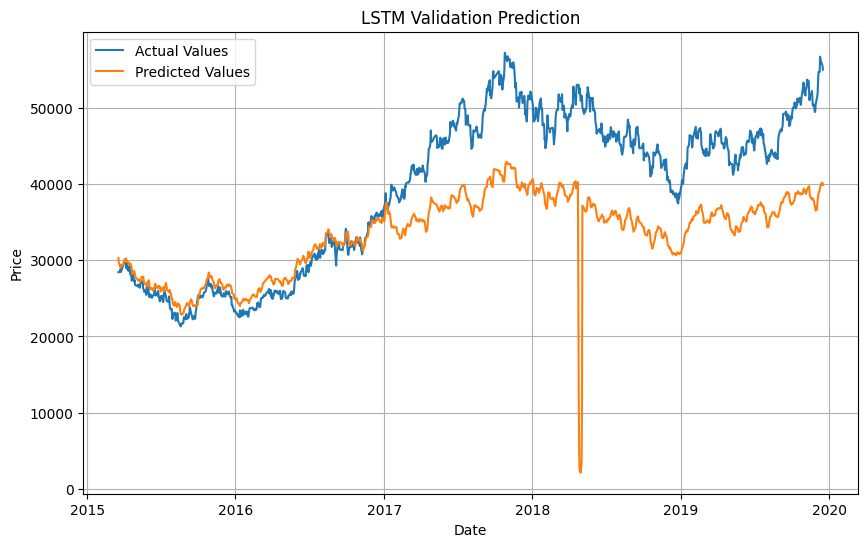

In [64]:
X_val, y_val = create_sequences(x_val_same, y_val_same, time_steps)

y_pred = model_same_hyper3.predict(X_val)
y_pred = y_scaler_same_df.inverse_transform(y_pred)
y_pred = np.round(np.exp(y_pred), 4)

y_val =y_scaler_same_df.inverse_transform(y_val)
y_val = np.round(np.exp(y_val), 4)

plt.figure(figsize=(10, 6))
plt.plot(same_df[features][3519:4687].index, np.squeeze(y_val), label='Actual Values')
plt.plot(same_df[features][3519:4687].index, np.squeeze(y_pred), label='Predicted Values')
plt.title('LSTM Validation Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [65]:
mse = mean_squared_error(y_val , y_pred )
rmse = np.sqrt(mean_squared_error(y_val , y_pred ))
mae = mean_absolute_error(y_val , y_pred )
r2 = r2_score(y_val , y_pred )

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

MAE: 6776.7469
MSE: 75974296.8742
RMSE: 8716.3236
R²: 0.2669


In [74]:
wandb.finish()

### Final Same Feat

In [84]:
wandb.finish()

In [85]:
wandb.init(project="LSTM Final - Same", name="hyper16", config={
    "epochs": 50,
    "batch_size": 32,
    "time_steps": 5,
    "lstm_units": [128,128,128],
    "optimizer": "adam",
    "loss": "mse",
},reinit=True)

time_steps = 5

model_same_hyper16 = tf.keras.Sequential([
    tf.keras.layers.LSTM(wandb.config.lstm_units[0], activation='tanh', input_shape=(time_steps, len(features0_same)), return_sequences=True),
    tf.keras.layers.LSTM(wandb.config.lstm_units[1], activation='tanh', return_sequences=True),
    tf.keras.layers.LSTM(wandb.config.lstm_units[2], activation='tanh'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)
])

model_same_hyper16.compile(optimizer=wandb.config.optimizer, loss='mse', metrics=['mse'])

In [86]:
model_same_hyper16.load_weights('/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/hyper16.weights.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 28 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [87]:
model_same_hyper16.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_20 (LSTM)                       │ (None, 5, 128)              │          75,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_21 (LSTM)                       │ (None, 5, 128)              │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_22 (LSTM)                       │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 355,585 (1.36 MB)

 Trainable params: 355,585 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

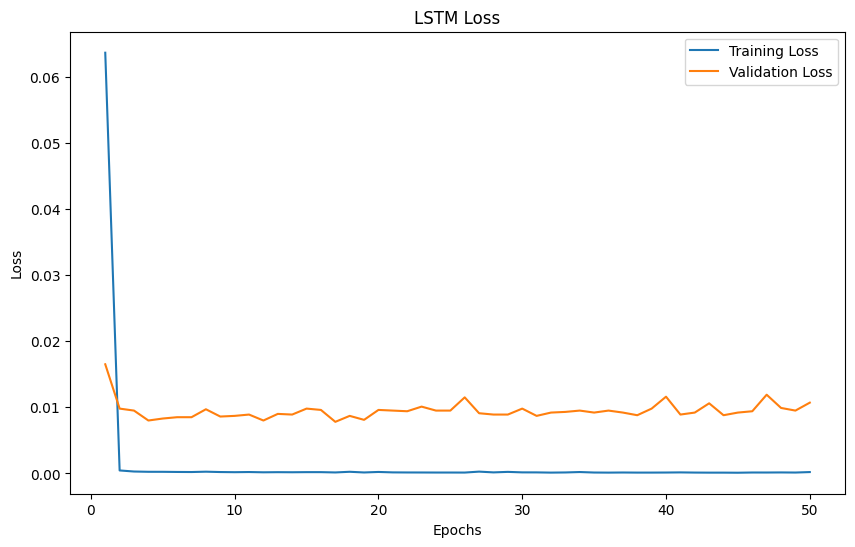

In [88]:
import matplotlib.pyplot as plt

# Provided training and validation loss data from the training log
train_loss = [
    0.0636, 0.00045083, 0.00028901, 0.00024724, 0.00024482, 0.000223, 0.00021201,
    0.00026297, 0.00021016, 0.00018707, 0.00021125, 0.00017027, 0.00019006,
    0.00017777, 0.0001946, 0.00019394, 0.00014861, 0.00024915, 0.00014576,
    0.00022225, 0.00015733, 0.00014539, 0.00014182, 0.00013518, 0.00013533,
    0.00013101, 0.00027258, 0.00015776, 0.00023377, 0.00015951, 0.00015639,
    0.00012414, 0.00014751, 0.00021015, 0.00013642, 0.00012306, 0.00014001,
    0.00012557, 0.00012666, 0.00013584, 0.00015612, 0.0001298, 0.00011917,
    0.00011987, 0.00010697, 0.00013958, 0.00013762, 0.00015017, 0.00013457,
    0.00020581
]
val_loss = [
    0.0165, 0.0098, 0.0095, 0.008, 0.0083, 0.0085, 0.0085, 0.0097, 0.0086, 0.0087,
    0.0089, 0.008, 0.009, 0.0089, 0.0098, 0.0096, 0.0078, 0.0087, 0.0081, 0.0096,
    0.0095, 0.0094, 0.0101, 0.0095, 0.0095, 0.0115, 0.0091, 0.0089, 0.0089, 0.0098,
    0.0087, 0.0092, 0.0093, 0.0095, 0.0092, 0.0095, 0.0092, 0.0088, 0.0098, 0.0116,
    0.0089, 0.0092, 0.0106, 0.0088, 0.0092, 0.0094, 0.0119, 0.0099, 0.0095, 0.0107
]

# Plotting the training vs validation loss
epochs = range(1, 51)
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('LSTM Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


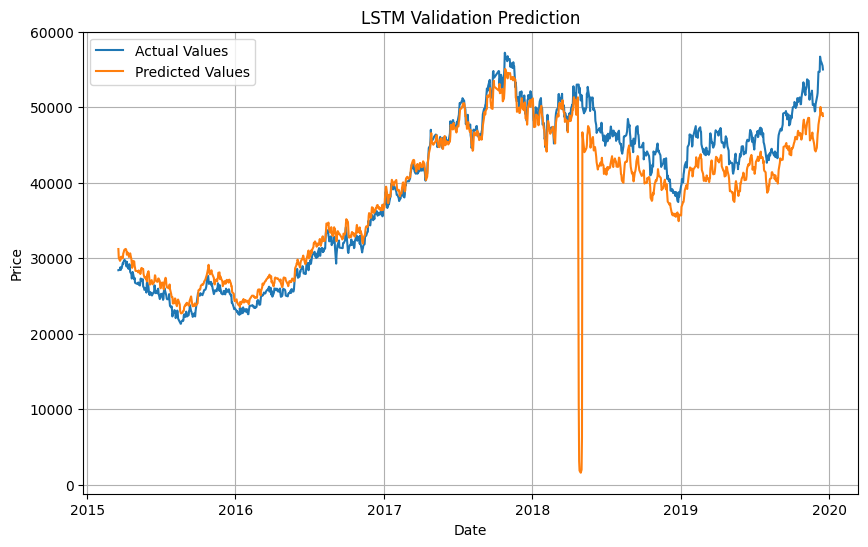

In [91]:
X_val, y_val = create_sequences(selected_x_val_same, selected_y_val_same, time_steps)

y_pred = model_same_hyper16.predict(X_val)
a,b = y_val, y_pred
y_pred = y_scaler_selected_same_df.inverse_transform(y_pred)
y_pred = np.round(np.exp(y_pred), 4)

y_val =y_scaler_selected_same_df.inverse_transform(y_val)
y_val = np.round(np.exp(y_val), 4)

plt.figure(figsize=(10, 6))
plt.plot(same_df[features][3519:4687].index, np.squeeze(y_val), label='Actual Values')
plt.plot(same_df[features][3519:4687].index, np.squeeze(y_pred), label='Predicted Values')
plt.title('LSTM Validation Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [90]:
mse = mean_squared_error(y_val , y_pred )
rmse = np.sqrt(mean_squared_error(y_val , y_pred ))
mae = mean_absolute_error(y_val , y_pred )
r2 = r2_score(y_val , y_pred )

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

MAE: 2359.3007
MSE: 18947625.3796
RMSE: 4352.8870
R²: 0.8172


In [92]:
mse = mean_squared_error(a , b)
rmse = np.sqrt(mean_squared_error(a ,b))
mae = mean_absolute_error(a , b)
r2 = r2_score(a , b)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

MAE: 0.0283
MSE: 0.0078
RMSE: 0.0883
R²: 0.4255


In [93]:
wandb.finish()

### Final Int Init

In [94]:
wandb.init(project="LSTM Final - Interp", name="initial", config={
    "epochs": 30,
    "batch_size": 32,
    "time_steps": 30,
    "lstm_units": [64, 64],
    "optimizer": "adam",
    "loss": "mse",
},reinit=True)

time_steps = 30

model_int_init = tf.keras.Sequential([
    tf.keras.layers.LSTM(wandb.config.lstm_units[0], activation='tanh', input_shape=(time_steps, len(features)), return_sequences=True),
    tf.keras.layers.LSTM(wandb.config.lstm_units[1], activation='tanh'),
    tf.keras.layers.Dense(1)
])

model_int_init.compile(optimizer=wandb.config.optimizer, loss='mse', metrics=['mse'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [95]:
model_int_init.load_weights('/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/interp_Initial.weights.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [96]:
model_int_init.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_23 (LSTM)                       │ (None, 30, 64)              │          28,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_24 (LSTM)                       │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 61,249 (239.25 KB)

 Trainable params: 61,249 (239.25 KB)

 Non-trainable params: 0 (0.00 B)

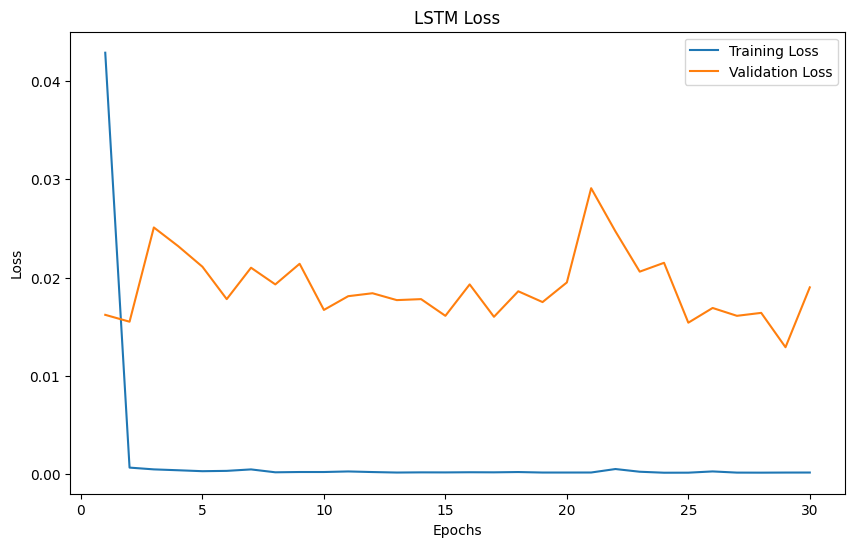

In [98]:
import matplotlib.pyplot as plt

train_loss = [
    0.0429, 0.00063886, 0.00045768, 0.00036824, 0.00027354, 0.00030614,
    0.00045512, 0.00016064, 0.00018976, 0.00018962, 0.00024747, 0.00018582,
    0.00013627, 0.00015393, 0.00014907, 0.00016558, 0.00015722, 0.00018667,
    0.00013632, 0.00013666, 0.00013962, 0.00049351, 0.00021722, 0.00011756,
    0.00012238, 0.00024917, 0.00012911, 0.00012407, 0.00013381, 0.00013668
]
val_loss = [
    0.0162, 0.0155, 0.0251, 0.0232, 0.0211, 0.0178, 0.0210, 0.0193, 0.0214,
    0.0167, 0.0181, 0.0184, 0.0177, 0.0178, 0.0161, 0.0193, 0.0160, 0.0186,
    0.0175, 0.0195, 0.0291, 0.0247, 0.0206, 0.0215, 0.0154, 0.0169, 0.0161,
    0.0164, 0.0129, 0.0190
]

epochs = range(1, 31)
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('LSTM Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


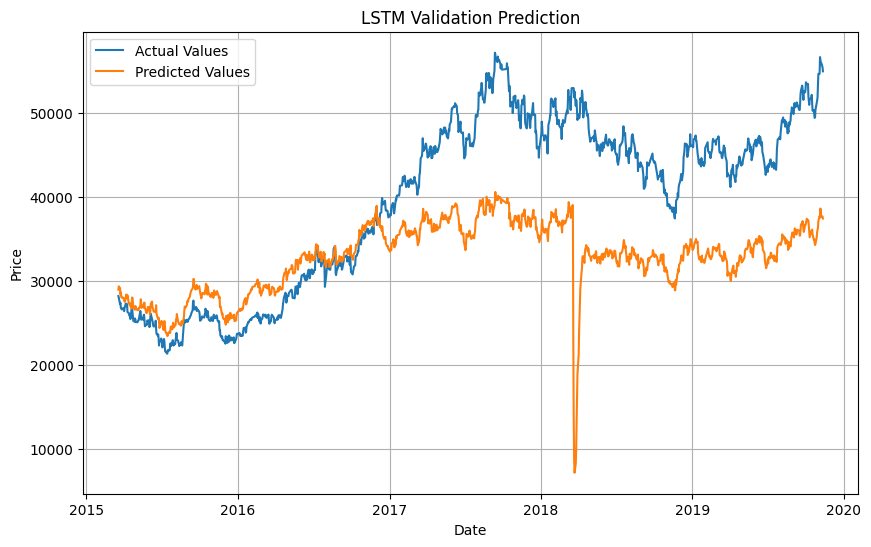

In [102]:
X_val, y_val = create_sequences(x_val_int, y_val_int, time_steps)

y_pred = model_int_init.predict(X_val)
a,b = y_val, y_pred
y_pred = y_scaler_int_df.inverse_transform(y_pred)
y_pred = np.round(np.exp(y_pred), 4)

y_val =y_scaler_int_df.inverse_transform(y_val)
y_val = np.round(np.exp(y_val), 4)

plt.figure(figsize=(10, 6))
plt.plot(same_df[features][3519:4662].index, np.squeeze(y_val), label='Actual Values')
plt.plot(same_df[features][3519:4662].index, np.squeeze(y_pred), label='Predicted Values')
plt.title('LSTM Validation Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [103]:
mse = mean_squared_error(y_val , y_pred )
rmse = np.sqrt(mean_squared_error(y_val , y_pred ))
mae = mean_absolute_error(y_val , y_pred )
r2 = r2_score(y_val , y_pred )

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

MAE: 8388.6989
MSE: 106639725.3358
RMSE: 10326.6512
R²: -0.0311


In [104]:
mse = mean_squared_error(a , b)
rmse = np.sqrt(mean_squared_error(a ,b))
mae = mean_absolute_error(a , b)
r2 = r2_score(a , b)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

MAE: 0.0906
MSE: 0.0129
RMSE: 0.1136
R²: 0.0498


In [105]:
wandb.finish()

### Final Int Hyper

In [106]:
wandb.init(project="LSTM Final - Interp", name="hyper2", config={
    "epochs": 50,
    "batch_size": 32,
    "time_steps": 5,
    "lstm_units": [128,64,64],
    "optimizer": "adam",
    "loss": "mse",
},reinit=True)

time_steps = 5

model_int_hyper2 = tf.keras.Sequential([
    tf.keras.layers.LSTM(wandb.config.lstm_units[0], activation='tanh', input_shape=(time_steps, len(features)), return_sequences=True),
    tf.keras.layers.LSTM(wandb.config.lstm_units[1], activation='tanh', return_sequences=True),
    tf.keras.layers.LSTM(wandb.config.lstm_units[2], activation='tanh'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)
])

model_int_hyper2.compile(optimizer=wandb.config.optimizer, loss='mse', metrics=['mse'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [107]:
model_int_hyper2.load_weights('/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/interp_hyper2.weights.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 28 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [108]:
model_int_hyper2.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_25 (LSTM)                       │ (None, 5, 128)              │          89,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_26 (LSTM)                       │ (None, 5, 64)               │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_27 (LSTM)                       │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 179,969 (703.00 KB)

 Trainable params: 179,969 (703.00 KB)

 Non-trainable params: 0 (0.00 B)

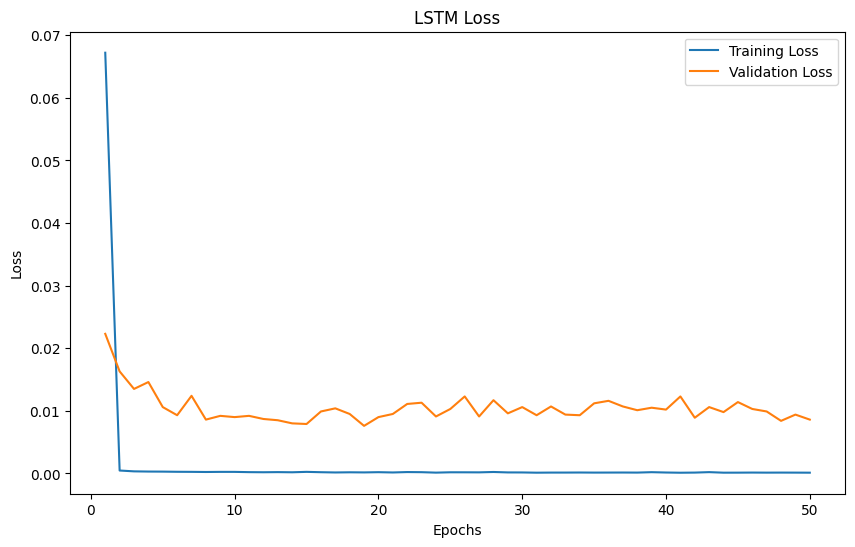

In [110]:
train_loss = [
    0.0672, 0.00046842, 0.00033538, 0.00030289, 0.00029266, 0.00026596,
    0.00025543, 0.00023344, 0.00025246, 0.00025138, 0.00020887, 0.00019232,
    0.00021294, 0.00018723, 0.00025412, 0.00019823, 0.00015784, 0.00018468,
    0.00016630, 0.00020271, 0.00015746, 0.00022160, 0.00020235, 0.00013154,
    0.00018596, 0.00018322, 0.00017500, 0.00023421, 0.00016492, 0.00015999,
    0.00012299, 0.00013890, 0.00014100, 0.00015038, 0.00013703, 0.00014210,
    0.00014805, 0.00013830, 0.00020361, 0.00014981, 0.00011685, 0.00013795,
    0.00021033, 0.00012404, 0.00012843, 0.00014202, 0.00013068, 0.00013797,
    0.00013249, 0.00012336
]
val_loss = [
    0.0223, 0.0163, 0.0135, 0.0146, 0.0106, 0.0093, 0.0124, 0.0086, 0.0092,
    0.0090, 0.0092, 0.0087, 0.0085, 0.0080, 0.0079, 0.0099, 0.0104, 0.0095,
    0.0076, 0.0090, 0.0095, 0.0111, 0.0113, 0.0091, 0.0103, 0.0123, 0.0091,
    0.0117, 0.0096, 0.0106, 0.0093, 0.0107, 0.0094, 0.0093, 0.0112, 0.0116,
    0.0107, 0.0101, 0.0105, 0.0102, 0.0123, 0.0089, 0.0106, 0.0098, 0.0114,
    0.0103, 0.0099, 0.0084, 0.0094, 0.0086
]

epochs = range(1, 51)
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('LSTM Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [39]:
X_val, y_val = create_sequences(x_val_int, y_val_int, time_steps)

y_pred = model_int_hyper2.predict(X_val)
a,b = y_val, y_pred
y_pred = y_scaler_int_df.inverse_transform(y_pred)
#y_pred = np.round(np.exp(y_pred), 4)

y_val =y_scaler_int_df.inverse_transform(y_val)
#y_val = np.round(np.exp(y_val), 4)

plt.figure(figsize=(10, 6))
plt.plot(same_df[features][3519:4687].index, np.squeeze(y_val), label='Actual Values')
plt.plot(same_df[features][3519:4687].index, np.squeeze(y_pred), label='Predicted Values')
plt.title('LSTM Validation Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'model_int_hyper2' is not defined

In [113]:
mse = mean_squared_error(y_val , y_pred )
rmse = np.sqrt(mean_squared_error(y_val , y_pred ))
mae = mean_absolute_error(y_val , y_pred )
r2 = r2_score(y_val , y_pred )

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

print('-'*20)
mse = mean_squared_error(a , b)
rmse = np.sqrt(mean_squared_error(a ,b))
mae = mean_absolute_error(a , b)
r2 = r2_score(a , b)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

MAE: 4263.2835
MSE: 35860540.6622
RMSE: 5988.3671
R²: 0.6540
--------------------
MAE: 0.0451
MSE: 0.0076
RMSE: 0.0874
R²: 0.4378


In [114]:
wandb.finish()

### Final Int Feat -> BEST

In [115]:
wandb.init(project="LSTM Final - Interp", name="hyper33", config={
    "epochs": 100,
    "batch_size": 64,
    "time_steps": 90,
    "lstm_units": [64, 64],
    "optimizer": "adam",
    "loss": "mse",
}, reinit=True)

In [118]:
input_layer = Input(shape=(90, len(features0_int)))

# Conv1D + MaxPooling
conv1 = Conv1D(64, kernel_size=3, activation='relu')(input_layer)
pool1 = MaxPooling1D(pool_size=2)(conv1)

# 첫 번째 LSTM
lstm1 = LSTM(wandb.config.lstm_units[0], activation='tanh', return_sequences=True)(pool1)

# 첫 번째 Skip Connection
skip1 = Add()([pool1, lstm1])

# 두 번째 LSTM
lstm2 = LSTM(wandb.config.lstm_units[1], activation='tanh')(skip1)

skip1_flattened = Flatten()(skip1)  # (batch_size, 5632)
skip1_reshaped = Dense(wandb.config.lstm_units[1])(skip1_flattened)  # (batch_size, 64)

# Add 레이어에 입력
skip2 = Add()([skip1_reshaped, lstm2])

# Dense Layers
dense1 = Dense(64, activation='relu')(skip2)
output_layer = Dense(1)(dense1)

model_int_hyper33_loaded = tf.keras.Model(inputs=input_layer, outputs=output_layer)
model_int_hyper33_loaded.compile(optimizer=Adam(learning_rate=0.0001), loss='mse', metrics=['mse'])

In [119]:
model_int_hyper33_loaded.load_weights('/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/interp_hyper33.weights.h5')

# 모델 요약 확인
model_int_hyper33_loaded.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7             │ (None, 90, 13)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_1 (Conv1D)         │ (None, 88, 64)         │          2,560 │ input_layer_7[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_1           │ (None, 44, 64)         │              0 │ conv1d_1[0][0]         │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_30 (LSTM)            │ (None, 44, 64)         │         33,024 │ max_pooling1d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_2 (Add)               │ (None, 44, 64)         │              0 │ max_pooling1d_1[0][0], │
│                           │                        │                │ lstm_30[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_1 (Flatten)       │ (None, 2816)           │              0 │ add_2[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_21 (Dense)          │ (None, 64)             │        180,288 │ flatten_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_31 (LSTM)            │ (None, 64)             │         33,024 │ add_2[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_3 (Add)               │ (None, 64)             │              0 │ dense_21[0][0],        │
│                           │                        │                │ lstm_31[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_22 (Dense)          │ (None, 64)             │          4,160 │ add_3[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_23 (Dense)          │ (None, 1)              │             65 │ dense_22[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 253,121 (988.75 KB)

 Trainable params: 253,121 (988.75 KB)

 Non-trainable params: 0 (0.00 B)

In [122]:
data = pd.read_csv('/content/drive/MyDrive/Time Series Project/Stock Price/data/merged_lstm.csv')

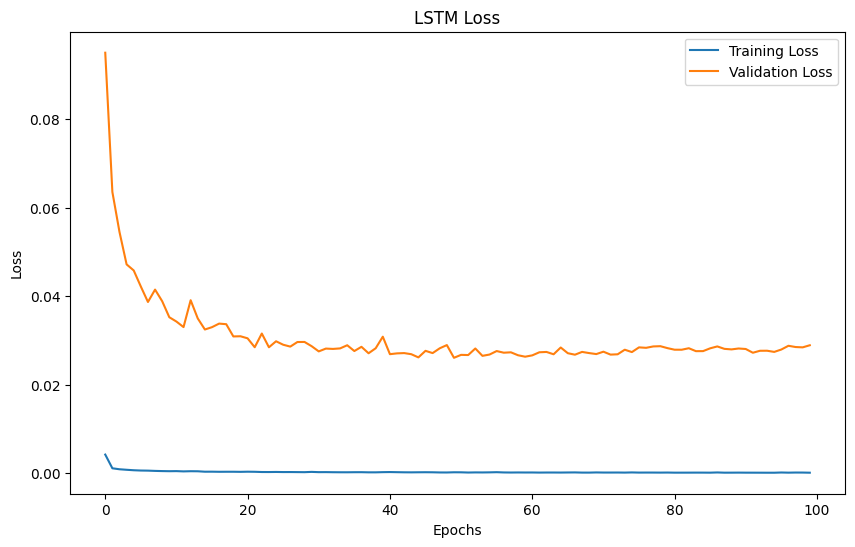

In [123]:
# Extract necessary columns
steps = data['Step']
train_loss = data['hyper33 - train_loss']
val_loss = data['hyper33 - val_loss']

# Plot the losses
plt.figure(figsize=(10, 6))
plt.plot(steps, train_loss, label='Training Loss')
plt.plot(steps, val_loss, label='Validation Loss')
plt.title('LSTM Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


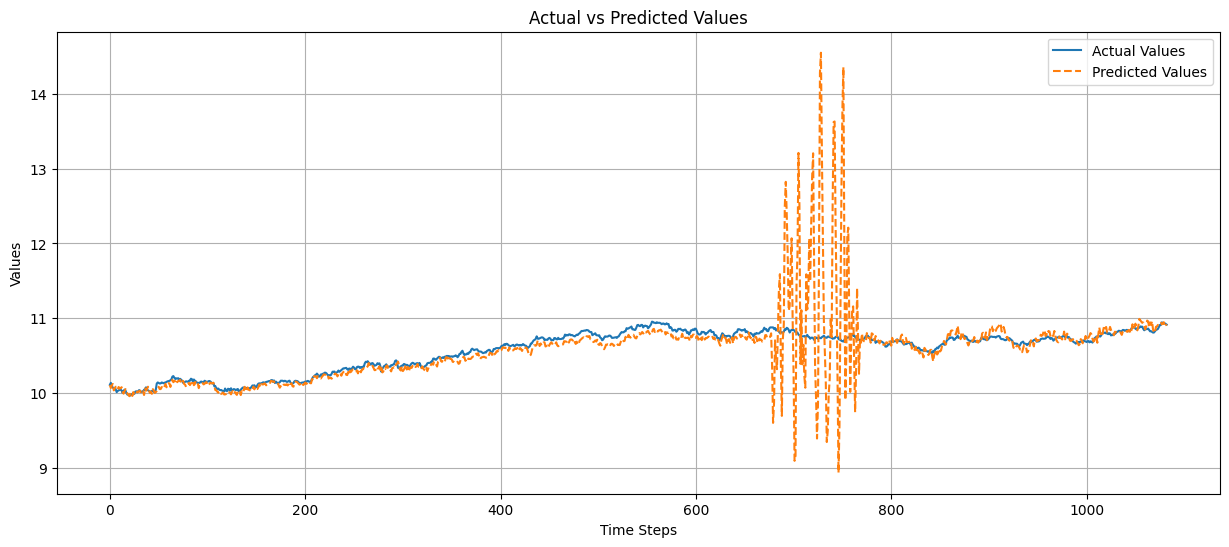

In [141]:
X_val, y_val = create_sequences(selected_x_val_int, selected_y_val_int, wandb.config.time_steps)

y_pred = model_int_hyper33_loaded.predict(X_val)
y_pred = y_scaler_selected_int_df.inverse_transform(y_pred)
y_test = y_scaler_selected_int_df.inverse_transform(y_val)

plt.figure(figsize=(15, 6))
plt.plot(y_test, label='Actual Values', linestyle='-')#, marker='o', alpha=0.7)
plt.plot(y_pred, label='Predicted Values', linestyle='--')#, marker='x', alpha=0.7)
plt.title('Actual vs Predicted Values')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step


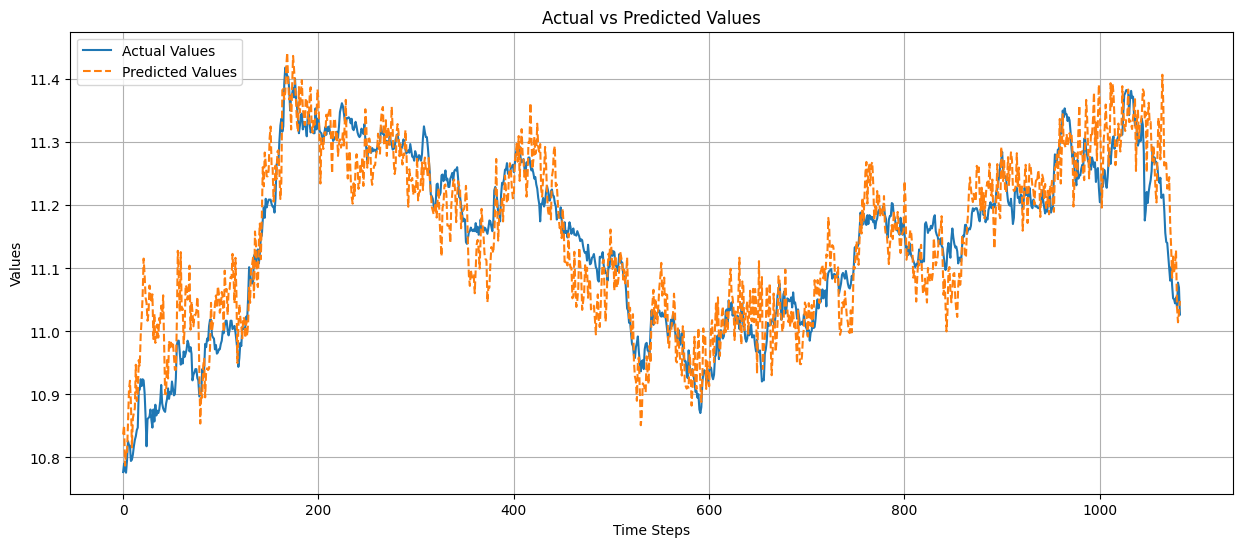

In [140]:
X_test, y_test = create_sequences(selected_x_test_int, selected_y_test_int, wandb.config.time_steps)

y_pred = model_int_hyper33_loaded.predict(X_test)
y_pred = y_scaler_selected_int_df.inverse_transform(y_pred)
y_test = y_scaler_selected_int_df.inverse_transform(y_test)

plt.figure(figsize=(15, 6))
plt.plot(y_test, label='Actual Values', linestyle='-')#, marker='o', alpha=0.7)
plt.plot(y_pred, label='Predicted Values', linestyle='--')#, marker='x', alpha=0.7)
plt.title('Actual vs Predicted Values')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

In [142]:
wandb.finish()

### BF Outlier Same Init

In [31]:
wandb.init(project="LSTM BF Outlier - Same", name="initial", config={
    "epochs": 30,
    "batch_size": 32,
    "time_steps": 30,
    "lstm_units": [64, 64],
    "optimizer": "adam",
    "loss": "mse",
},reinit=True)

time_steps = 30

model_same_bf_init = tf.keras.Sequential([
    tf.keras.layers.LSTM(wandb.config.lstm_units[0], activation='tanh', input_shape=(time_steps, len(features)), return_sequences=True),
    tf.keras.layers.LSTM(wandb.config.lstm_units[1], activation='tanh'),
    tf.keras.layers.Dense(1)
])

model_same_bf_init.compile(optimizer=wandb.config.optimizer, loss='mse', metrics=['mse'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [32]:
model_same_bf_init.load_weights('/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/bf_same.weights.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [33]:
model_same_bf_init.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 30, 64)              │          28,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 61,249 (239.25 KB)

 Trainable params: 61,249 (239.25 KB)

 Non-trainable params: 0 (0.00 B)

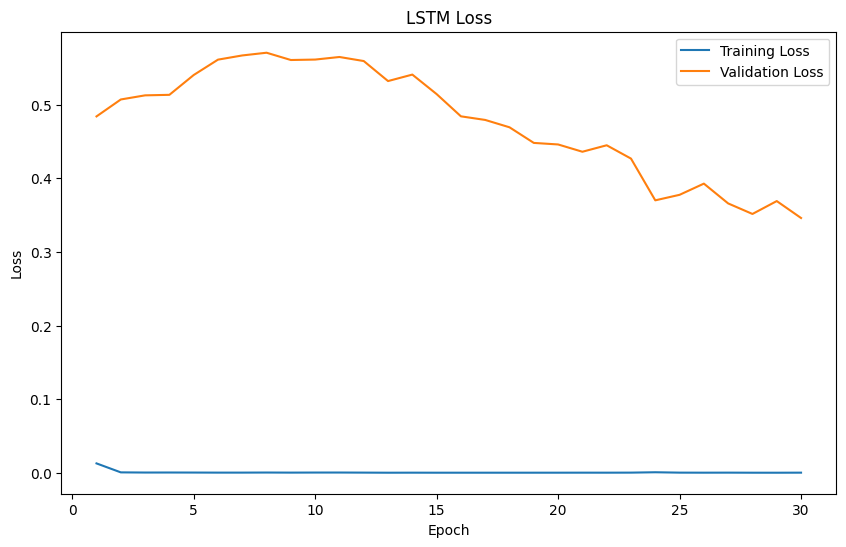

In [34]:
# Epoch-wise data for the second set
epochs = list(range(1, 31))
train_loss = [
    0.0128, 0.00060644, 0.00038012, 0.0004181, 0.00035754, 0.00026332, 0.00027603, 0.00038715,
    0.00027469, 0.00036644, 0.00038484, 0.00027363, 0.0001452, 0.00019975, 0.0001529,
    0.00015946, 0.00015991, 0.00016344, 0.00016389, 0.0001746, 0.00020429, 0.00018896,
    0.00025938, 0.00075943, 0.00024689, 0.00018555, 0.00024516, 0.00014933, 0.00013138,
    0.00021892
]
val_loss = [
    0.4841, 0.5071, 0.5127, 0.5134, 0.5403, 0.5612, 0.5669, 0.5706, 0.5607, 0.5613, 0.5648,
    0.5593, 0.5321, 0.5409, 0.5144, 0.4842, 0.4793, 0.4693, 0.4481, 0.446, 0.4361, 0.4449,
    0.4268, 0.3701, 0.3776, 0.3928, 0.3659, 0.3516, 0.3691, 0.3461
]

# Plot the losses
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('LSTM Loss')
plt.legend()
plt.show()

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


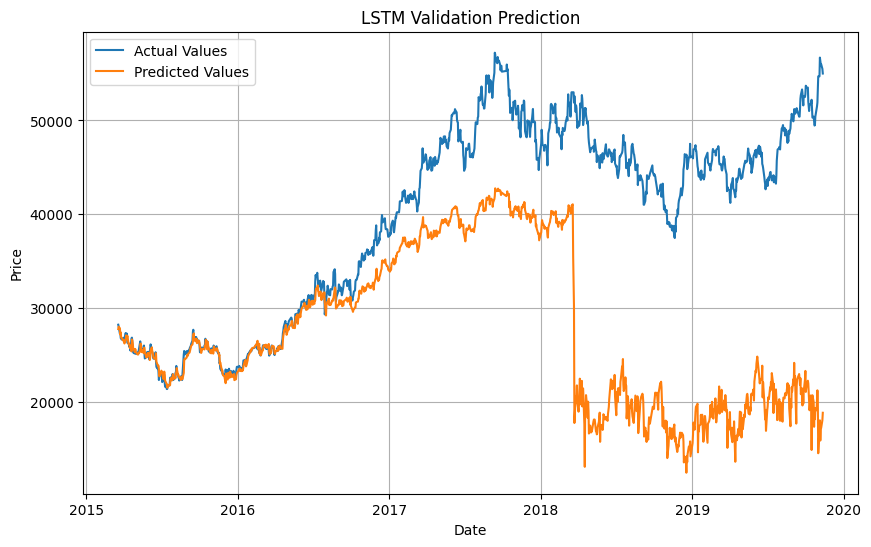

In [43]:
X_val, y_val = create_sequences(x_val_same_wo, y_val_same_wo, wandb.config.time_steps)

y_pred = model_same_bf_init.predict(X_val)
a,b = y_val, y_pred
y_pred = y_scaler_same_wo.inverse_transform(y_pred)

y_val = y_scaler_same_wo.inverse_transform(y_val)

plt.figure(figsize=(10, 6))
plt.plot(same_df[features][3519:4662].index, np.squeeze(y_val), label='Actual Values')
plt.plot(same_df[features][3519:4662].index, np.squeeze(y_pred), label='Predicted Values')
plt.title('LSTM Validation Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [44]:
mse = mean_squared_error(y_val , y_pred )
rmse = np.sqrt(mean_squared_error(y_val , y_pred ))
mae = mean_absolute_error(y_val , y_pred )
r2 = r2_score(y_val , y_pred )

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

print('-'*20)
mse = mean_squared_error(a , b)
rmse = np.sqrt(mean_squared_error(a ,b))
mae = mean_absolute_error(a , b)
r2 = r2_score(a , b)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

MAE: 12235.5884
MSE: 285512919.3709
RMSE: 16897.1275
R²: -1.7607
--------------------
MAE: 0.4260
MSE: 0.3461
RMSE: 0.5883
R²: -1.7607


In [45]:
wandb.finish()

### BF Outlier Same Hyper

In [46]:
wandb.init(project="LSTM BF Outlier - Same", name="hyper6", config={
    "epochs": 30,
    "batch_size": 64,
    "time_steps": 90,
    "lstm_units": [128, 64],
    "optimizer": "adam",
    "loss": "mse",
}, reinit=True)

time_steps = 90

In [47]:
input_layer = Input(shape=(time_steps, len(features)))

# Conv1D + MaxPooling
conv1 = Conv1D(128, kernel_size=3, activation='relu')(input_layer)
pool1 = MaxPooling1D(pool_size=2)(conv1)

# 첫 번째 LSTM
lstm1 = LSTM(wandb.config.lstm_units[0], activation='tanh', return_sequences=True)(pool1)

# 첫 번째 Skip Connection
skip1 = Add()([pool1, lstm1])

# 두 번째 LSTM
lstm2 = LSTM(wandb.config.lstm_units[1], activation='tanh', return_sequences=True)(skip1)

skip1_adjusted = Conv1D(64, kernel_size=1, activation='relu')(skip1)  # (batch_size, new_time_steps, 64)
skip2 = Add()([skip1_adjusted, lstm2])

# 세 번째 LSTM (Skip Connection 적용 X)
lstm3 = LSTM(wandb.config.lstm_units[1], activation='tanh')(skip2)

# Dense Layers
dense1 = Dense(64, activation='relu')(lstm3)
output_layer = Dense(1)(dense1)

# 모델 정의 및 컴파일
model_same_bf_hyper6 = tf.keras.Model(inputs=input_layer, outputs=output_layer)
model_same_bf_hyper6.compile(optimizer=wandb.config.optimizer, loss=wandb.config.loss, metrics=['mse'])

In [48]:
model_same_bf_hyper6.load_weights('/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/bf_same_hyper6.weights.h5')
model_same_bf_hyper6.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 36 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 90, 45)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d (Conv1D)           │ (None, 88, 128)        │         17,408 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d             │ (None, 44, 128)        │              0 │ conv1d[0][0]           │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_2 (LSTM)             │ (None, 44, 128)        │        131,584 │ max_pooling1d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 44, 128)        │              0 │ max_pooling1d[0][0],   │
│                           │                        │                │ lstm_2[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_1 (Conv1D)         │ (None, 44, 64)         │          8,256 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_3 (LSTM)             │ (None, 44, 64)         │         49,408 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_1 (Add)               │ (None, 44, 64)         │              0 │ conv1d_1[0][0],        │
│                           │                        │                │ lstm_3[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_4 (LSTM)             │ (None, 64)             │         33,024 │ add_1[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 64)             │          4,160 │ lstm_4[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 1)              │             65 │ dense_1[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 243,905 (952.75 KB)

 Trainable params: 243,905 (952.75 KB)

 Non-trainable params: 0 (0.00 B)

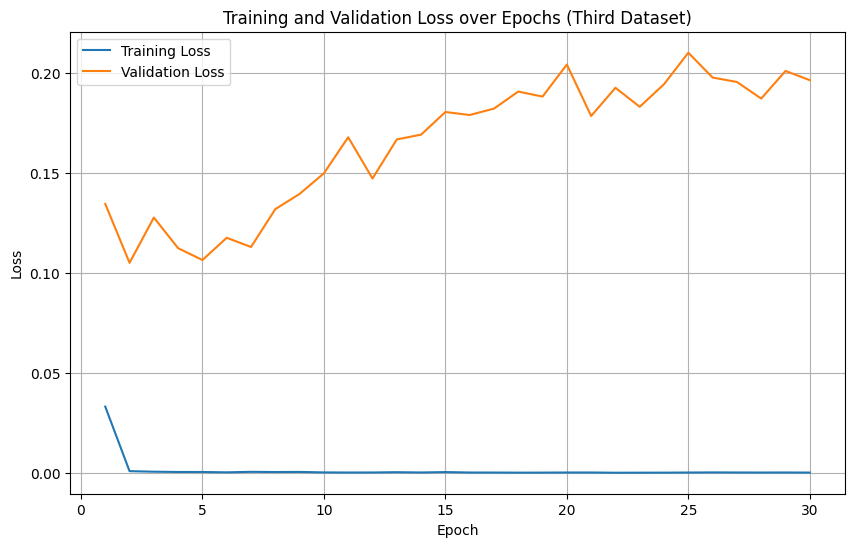

In [49]:
# Re-importing necessary libraries due to environment reset
import matplotlib.pyplot as plt

# Epoch-wise data for the third set
epochs = list(range(1, 31))
train_loss = [
    0.0332, 0.000966, 0.00069161, 0.00056049, 0.0005415, 0.00037787, 0.00062813,
    0.00053241, 0.00058281, 0.0003386, 0.00028776, 0.00031078, 0.00044454, 0.00030559,
    0.00050963, 0.0002907, 0.00027294, 0.00023274, 0.00024174, 0.00029906, 0.00029938,
    0.00018465, 0.00021167, 0.00022631, 0.00028937, 0.00034559, 0.00030798, 0.00028202,
    0.00030907, 0.00025355
]
val_loss = [
    0.1344, 0.105, 0.1276, 0.1123, 0.1064, 0.1175, 0.1129, 0.1318, 0.1394, 0.1497,
    0.1677, 0.1471, 0.1666, 0.169, 0.1803, 0.1788, 0.182, 0.1905, 0.188, 0.204,
    0.1783, 0.1924, 0.1829, 0.1942, 0.2099, 0.1975, 0.1953, 0.187, 0.2008, 0.1962
]

# Plot the losses
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs (Third Dataset)')
plt.legend()
plt.grid()
plt.show()


34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 141ms/step


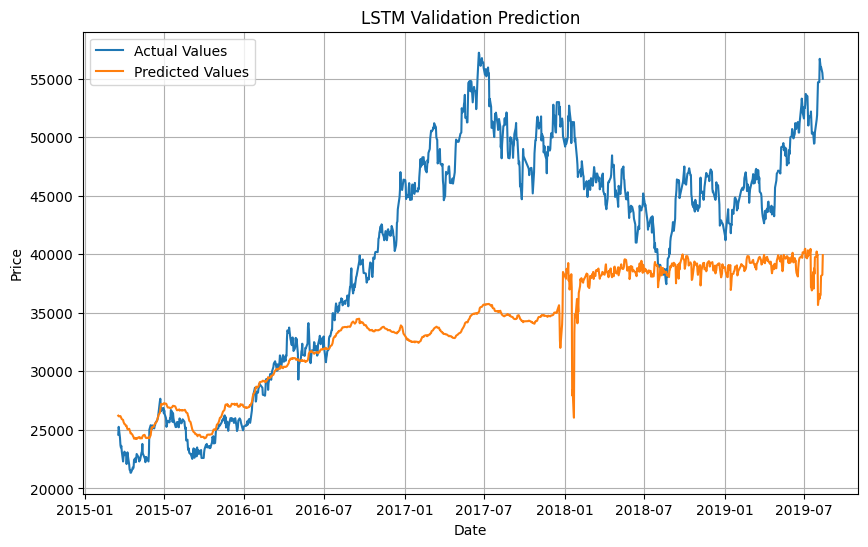

In [50]:
X_val, y_val = create_sequences(x_val_same_wo, y_val_same_wo, wandb.config.time_steps)

y_pred = model_same_bf_hyper6.predict(X_val)
a,b = y_val, y_pred
y_pred = y_scaler_same_wo.inverse_transform(y_pred)

y_val = y_scaler_same_wo.inverse_transform(y_val)

plt.figure(figsize=(10, 6))
plt.plot(same_df[features][3519:4602].index, np.squeeze(y_val), label='Actual Values')
plt.plot(same_df[features][3519:4602].index, np.squeeze(y_pred), label='Predicted Values')
plt.title('LSTM Validation Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

### BF Outlier Same Feat

### BF Outlier Int Init

### BF Outlier Int Hyper

### BF Outlier Feat